# Predicting White Wine Quality

For this notebook we are going to work with the White Wine Quality dataset (https://archive.ics.uci.edu/ml/datasets/wine+quality).

We can first load the dataset into a pandas dataframe and plot the features we are going to use to predict the final quality to see what we are working with.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

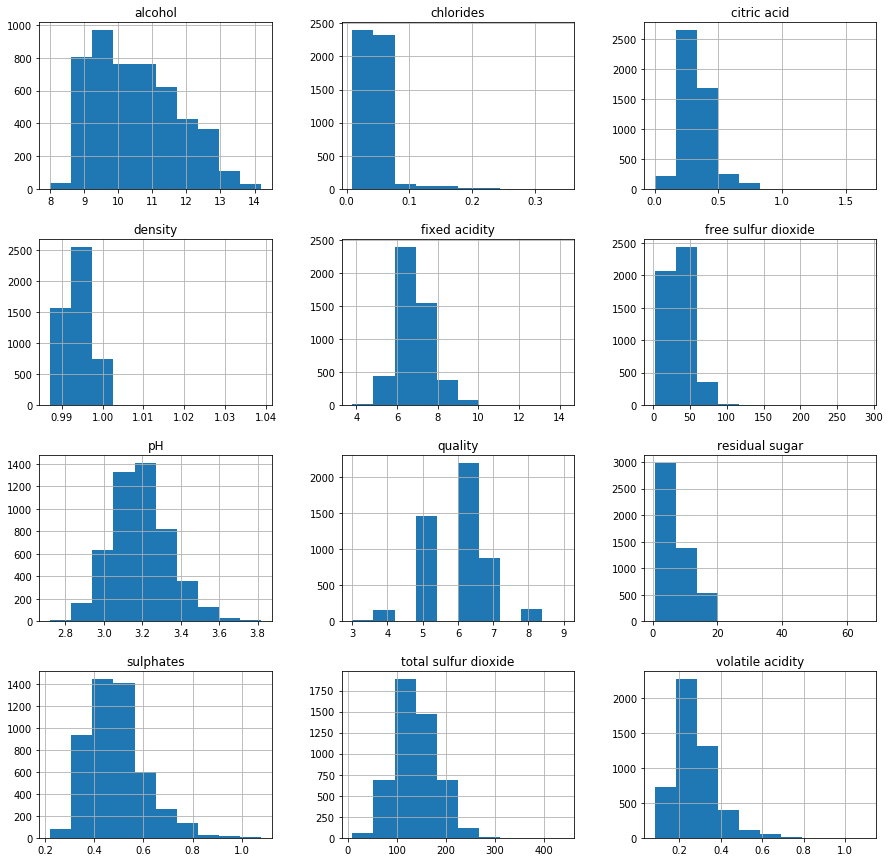

In [2]:
# Load wine dataset into pandas dataframe
df = pd.read_csv("white-wine-quality.csv", sep=";")
X = df.drop("quality", 1)
y = df["quality"]

# Plot features histograms
df.hist(figsize = [15, 15]);

We can also check the quality outcome distribution:

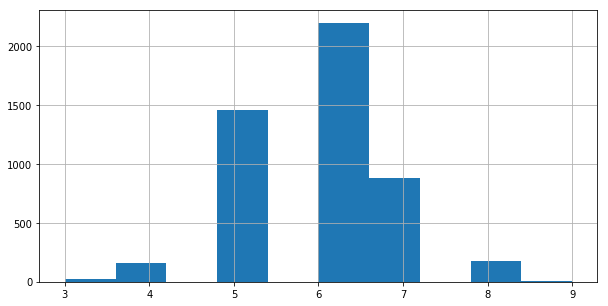

In [3]:
# Plot outcome histogram
y.hist(figsize = [10, 5]);

For some of the quality classes we don't have enough datapoints so for the purpose of this project we are going to classify a wine in two categories: "good", when its quality is greater than 5, or "bad" when its quality is less than or equal to 5. Let's transform the outcome vector to a binary vector representing this classification.

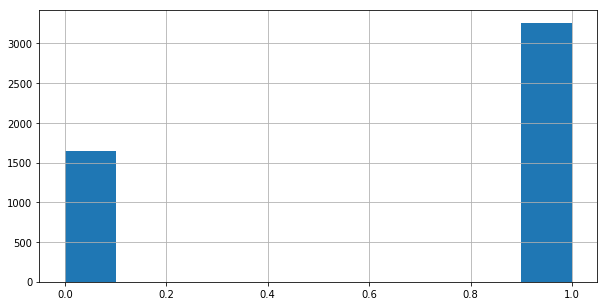

In [4]:
y = y > 5
y.hist(figsize = [10, 5]);

## k-Nearest Neighbors Model

As out first try to predict the quality of a white wine, we are going to train a k-Nearest Neighbors Model.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

# Split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Instantiate KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5)
model = model.fit(X_train, y_train)

print("k-Nearest Neighbors accuracy for test set: %f" % model.score(X_test, y_test))
y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred))

k-Nearest Neighbors accuracy for test set: 0.714286
             precision    recall  f1-score   support

      False       0.56      0.51      0.53       312
       True       0.78      0.81      0.79       668

avg / total       0.71      0.71      0.71       980



We obtained an accuracy score of 0.714286. But if we look at the ranges of values for the histograms presented at the beginning of this notebook, we can identify some differences between some of them of almost 100 times. For example, the "chlorides" feature ranges from 0 to 0.3, while the "total sulfure dioxide" ranges from 0 to 400. To normalize the ranges of values we are going to apply **data scaling**, and see if it improves the accuracy of our model.

In [6]:
from sklearn.preprocessing import scale

# Apply data scaling to features values
X = scale(X)

# Split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Train new model with scaled training data
model = model.fit(X_train, y_train)

print("Scaled k-Nearest Neighbors accuracy for test set: %f" % model.score(X_test, y_test))
y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred))

Scaled k-Nearest Neighbors accuracy for test set: 0.777551
             precision    recall  f1-score   support

      False       0.67      0.59      0.63       312
       True       0.82      0.86      0.84       668

avg / total       0.77      0.78      0.77       980



We improved the accuracy to 0.777551. The data scaling process helped normalizing the ranges of values of the features.

## Logistic Regression Model

Secondly, we can train a **Logistic Regression** model to see how it predicts the wine quality.

In [7]:
from sklearn.linear_model import LogisticRegression

# We need to reset the contents of X and y to its original values
# Load wine dataset into pandas dataframe
df = pd.read_csv("white-wine-quality.csv", sep=";")
X = df.drop("quality", 1)
y = df["quality"]

# Split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Instantiate Logistic Regression Model
model = LogisticRegression()

# Train model with training data
model = model.fit(X_train, y_train)

print("Logistic Regression accuracy for test set: %f" % model.score(X_test, y_test))
y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred))

Logistic Regression accuracy for test set: 0.525510
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         6
          4       0.00      0.00      0.00        26
          5       0.56      0.54      0.55       280
          6       0.51      0.79      0.62       452
          7       0.45      0.05      0.09       178
          8       0.00      0.00      0.00        36
          9       0.00      0.00      0.00         2

avg / total       0.48      0.53      0.46       980



We obtained an accuracy score of 0.525510. Let's see what happen now if we scale our data as we did before for the kNN model.

In [8]:
# Apply data scaling to features values
X = scale(X)

# Split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Train new model with scaled training data
model = model.fit(X_train, y_train)

print("Scaled Logistic Regression score for test set: %f" % model.score(X_test, y_test))
y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred))

Scaled Logistic Regression score for test set: 0.530612
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         6
          4       1.00      0.04      0.07        26
          5       0.56      0.54      0.55       280
          6       0.52      0.78      0.63       452
          7       0.46      0.09      0.15       178
          8       0.00      0.00      0.00        36
          9       0.00      0.00      0.00         2

avg / total       0.51      0.53      0.47       980



We got a similar accuracy score. It only improved to 0.530612.

As a conclusion we can state that the k-Nearest Neighbors Model performs much better than the Logistic Regression Model.